In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import json 
from astropy import units as u
import itertools as it
import os
import matplotlib.colors as mcolors
import random

In [2]:
json_list = os.listdir("/Users/snorris/manyTDE/data/sources/")
del json_list[64]
json_list[-32]

'ASASSN-14ae.json'

In [3]:
print(len(json_list))
type(json_list)

92


list

In [4]:
TDE_data = []
for file in range(len(json_list)):
    with open("/Users/snorris/manyTDE/data/sources/" + json_list[file]) as f:
        TDE_data.append(json.load(f))
print(TDE_data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
type(TDE_data)

list

In [6]:
TDE_data[91].keys()

dict_keys(['name', 'catalog_version', 'catalog_creation_date', 'ra', 'dec', 'z', 'peak_year', 'peak_mjd', 'peak_limit', 'spectral_type', 'spectral_subtype', 'paper_ref', 'nickname', 'extinction', 'host', 'lightcurve'])

In [7]:
print(json_list[91])

AT2022hvp.json


In [8]:
from astropy.cosmology import WMAP9 as cosmo
Ho = cosmo.H(0)  
from astropy.constants import c
from astropy.constants import e
sol = c.to(u.km/u.s)



In [9]:
TDE_data[91].get('z')

0.112

In [10]:
TDE_data[59].get('lightcurve')['data']

[[57630.842524, 'UVW2.uvot', 0.0008790225168308824, 3.817546285283605e-05],
 [57635.247923, 'UVW2.uvot', 0.0006982324040771676, 3.790481002209443e-05],
 [57636.617443, 'UVW2.uvot', 0.0006792036326171801, 2.9497438973428475e-05],
 [57638.610965, 'UVW2.uvot', 0.0005915616341754767, 3.2113994178509945e-05],
 [57639.48179, 'UVW2.uvot', 0.0005345643593969647, 2.9019793938531063e-05],
 [57640.182468, 'UVW2.uvot', 0.0005445026528424219, 2.9559312188893226e-05],
 [57642.574542, 'UVW2.uvot', 0.0004528975799036195, 2.9503637972921845e-05],
 [57643.602521, 'UVW2.uvot', 0.0004405548635065516, 2.3916318274566952e-05],
 [57645.849684, 'UVW2.uvot', 0.00036307805477010324, 1.9710349460852806e-05],
 [57648.720847, 'UVW2.uvot', 0.0002992264636608183, 1.6244050250914658e-05],
 [57651.438241, 'UVW2.uvot', 0.00022080047330188878, 1.4383864073495485e-05],
 [57655.390176, 'UVW2.uvot', 0.00020137242498623648, 1.5304613271324827e-05],
 [57655.45011, 'UVW2.uvot', 0.00020701413487910202, 1.79810192907939e-05],
 

In [11]:
TDE_data[91]['lightcurve']["data"][0][0]
TDE_data[91].get('peak_mjd')

59694.95833333332

In [48]:
for json_file in json_list:
    tde_name = json_file[:-5]
    def plot_lightcurve(tde_name):
        with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
            TDE_data = json.load(f)
        flux_filter = []
        mag_filter = []
        absMag_filter = []
        error_filter = []
        flux_error_filter = []
        mag_error_filter = []
        mjd_date_filter = []
        peak_date_filter = []
        rest_time_filter = []
        lc_filters = TDE_data['lightcurve']['filters']
        for m in range(len(TDE_data)):
            peak_year = TDE_data[m].get('peak_mjd')
            for i in range (len(TDE_data[m]['lightcurve']["data"])):
                #for filter in lc_filters:
                    # find the observations whose filter == the filter in the loop
                flux_filter.append(TDE_data[m]['lightcurve']["data"][i][2])
                error_filter.append(TDE_data[m]['lightcurve']["data"][i][3])
                mjd_date_filter.append(TDE_data[m]['lightcurve']["data"][i][0])
                distance = (sol*TDE_data[m].get('z'))/Ho         
        distance_pc = distance.to(u.pc)
        distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
        flux_filter = u.Jy*np.array(flux_filter)
        mag_filter = u.Magnitude(flux_filter.to(u.AB))     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter)
        mjd_date_filter= np.array(mjd_date_filter)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-TDE_data[m].get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2)    
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='k.')
        plt.gca().invert_yaxis()
        plt.xlim(-5,150)
        plt.ylim(-10,-22)
        return(lightcurve)
plot_lightcurve(TDE_data[59].get('name'))

KeyError: 0

<ErrorbarContainer object of 3 artists>

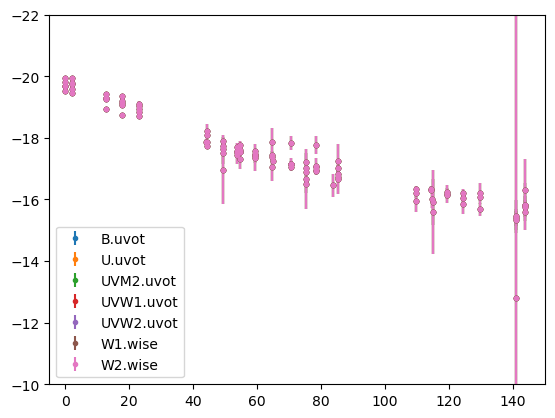

In [47]:
def plot_lightcurve(tde_name):
    with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
        tde_data = json.load(f)
    flux_filter = []
    mag_filter = []
    absMag_filter = []
    error_filter = []
    flux_error_filter = []
    mag_error_filter = []
    mjd_date_filter = []
    peak_date_filter = []
    rest_time_filter = []
    lc_filters = tde_data['lightcurve']['filters']
    for i in range (len(tde_data['lightcurve']["data"])):
        peak_year = tde_data.get('peak_mjd')
        flux_filter.append(tde_data['lightcurve']["data"][i][2])
        error_filter.append(tde_data['lightcurve']["data"][i][3])
        mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
        distance = (sol*tde_data.get('z'))/Ho         
    distance_pc = distance.to(u.pc)
    distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
    flux_filter = u.Jy*np.array(flux_filter)
    mag_filter = u.Magnitude(flux_filter.to(u.AB))     
    absMag_filter = mag_filter.value - distance_mod
    flux_error_filter = u.Jy * np.array(error_filter)
    mjd_date_filter= np.array(mjd_date_filter)
    peak_date_filter = mjd_date_filter - peak_year
    rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
    mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
    for element in lc_filters: 
        lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element)
        plt.gca().invert_yaxis()
        plt.xlim(-5,150)
        plt.ylim(-10,-22)
        plt.legend()
    return(lightcurve)
plot_lightcurve(TDE_data[60].get('name'))

In [90]:
lc_color_dict = {}
for surv in ['ztf','ps','sdss']:
  lc_color_dict['g.'+surv] = 'g'
  lc_color_dict['r.'+surv] = 'r'
  lc_color_dict['i.'+surv] = 'brown'

lc_color_dict['UVW2.uvot'] = 'violet'
lc_color_dict['UVM2.uvot'] = 'magenta'
lc_color_dict['UVW1.uvot'] = 'fuchsia'

lc_color_dict['U.uvot'] = 'darkblue'
lc_color_dict['u.sdss'] = 'darkblue'

lc_color_dict['F125LP'] = 'darkviolet'
lc_color_dict['F150LP'] = 'darkviolet'
lc_color_dict['F225W'] = 'magenta'

lc_color_dict['FUV'] = 'darkviolet'
lc_color_dict['NUV'] = 'magenta'

lc_color_dict['B.uvot'] = 'lightblue'
lc_color_dict['V.uvot'] = 'orange'
lc_color_dict['c.atlas'] = 'cyan'
lc_color_dict['o.atlas'] = 'orange'
lc_color_dict['W1.wise'] = 'cyan'
lc_color_dict['W2.wise'] = 'orange'

marker_dict = {key:'o' for key in lc_color_dict}
marker_dict['UVW1.uvot'] = 's'
marker_dict['UVM2.uvot'] = 's'
marker_dict['UVW2.uvot'] = 's'

marker_dict['r.ztf'] = 's'

marker_dict['F125LP'] = '*'
marker_dict['F150LP'] = 'd'
marker_dict['F225W'] = '*'
lc_color_dict.values()

dict_values(['g', 'r', 'brown', 'g', 'r', 'brown', 'g', 'r', 'brown', 'violet', 'magenta', 'fuchsia', 'darkblue', 'darkblue', 'darkviolet', 'darkviolet', 'magenta', 'darkviolet', 'magenta', 'lightblue', 'orange', 'cyan', 'orange', 'cyan', 'orange'])

ASASSN-14ae


(None, <ErrorbarContainer object of 3 artists>)

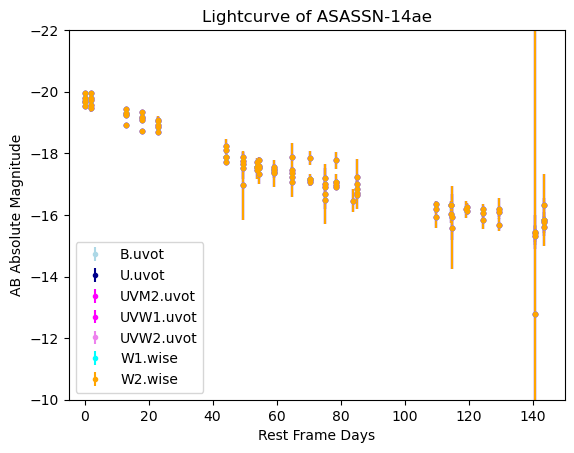

In [102]:
for json_file in json_list:
    tde_name = json_file[:-5]
    def plot_lightcurve(tde_name):
        with open("/Users/snorris/manyTDE/data/sources/{}.json".format(tde_name)) as f:
            tde_data = json.load(f)
        flux_filter = []
        mag_filter = []
        absMag_filter = []
        error_filter = []
        flux_error_filter = []
        mag_error_filter = []
        mjd_date_filter = []
        peak_date_filter = []
        rest_time_filter = []
        lc_filters = tde_data['lightcurve']['filters']
        for i in range (len(tde_data['lightcurve']["data"])):
            peak_year = tde_data.get('peak_mjd')
            flux_filter.append(tde_data['lightcurve']["data"][i][2])
            error_filter.append(tde_data['lightcurve']["data"][i][3])
            mjd_date_filter.append(tde_data['lightcurve']["data"][i][0])
            distance = (sol*tde_data.get('z'))/Ho         
        distance_pc = distance.to(u.pc)
        distance_mod = (5*np.log10(distance_pc/(10*u.pc)))
        flux_filter = u.Jy*np.array(flux_filter)
        mag_filter = u.Magnitude(flux_filter.to(u.AB))     
        absMag_filter = mag_filter.value - distance_mod
        flux_error_filter = u.Jy * np.array(error_filter)
        mjd_date_filter= np.array(mjd_date_filter)
        peak_date_filter = mjd_date_filter - peak_year
        rest_time_filter = peak_date_filter*np.sqrt(1-tde_data.get('z')**2)
        mag_error_filter = np.sqrt((2.5/np.log(10))*(flux_error_filter/flux_filter)**2) 
        for element in lc_filters: 
            lightcurve = plt.errorbar(rest_time_filter,absMag_filter,yerr = mag_error_filter,fmt='.',label= element, c = lc_color_dict[element])
            plt.gca().invert_yaxis()
            plt.xlim(-5,150)
            plt.ylim(-10,-22)
            plt.legend()
            plt.xlabel("Rest Frame Days")
            plt.ylabel("AB Absolute Magnitude")
            plt.legend()
            plt.title("Lightcurve of {}".format(tde_name))
        return(print(tde_name),lightcurve)
plot_lightcurve(json_list[60].replace('.json',''))